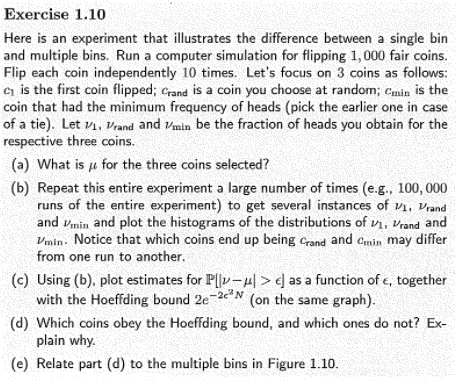

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
def lanzarm(num_lanzamientos): #donde 1 es cara y 0 es sello
  prob = np.random.randint(2, size=(num_lanzamientos))
  return prob 

In [2]:
def experimento(cant_monedas, num_lanzamientos):
  v1 = []
  vrand = []
  vmin=[]
  crand = np.random.randint(cant_monedas)
  i=0
  cant_caras = 0
  cant_sellos = 0
  min_caras_local1 = num_lanzamientos
  for i in range (cant_monedas):
    total_monedas = lanzarm(num_lanzamientos)
    j=0
    min_caras_local2 = 0
    for j in range (num_lanzamientos):
      if total_monedas[j] == 1:
        cant_caras = cant_caras + 1
        min_caras_local2 = min_caras_local2 + 1
      elif  total_monedas[j] == 0:
        cant_sellos = cant_sellos + 1
      j +=1
    if i == crand:
      vrand = total_monedas
    if min_caras_local1 > min_caras_local2:
      min_caras_local1 = min_caras_local2
      vmin = total_monedas
    if i == 0:
      v1 = total_monedas
    i +=1
  freq_cg = cant_caras/(num_lanzamientos * cant_monedas)
  return v1, vmin, vrand, freq_cg 

In [3]:
def frecuencias_por_experimento(cant_monedas, num_lanzamientos, v1, vmin, vrand, freq_cg):
  j=0
  c_v1 = 0
  for j in range(len(v1)):
    if v1[j] == 1:
      c_v1 = c_v1 +1
  frec_c_v1 = c_v1 / len(v1)

  j=0
  c_vmin = 0
  for j in range(len(vmin)):
    if vmin[j] == 1:
      c_vmin = c_vmin +1
  frec_c_vmin = c_vmin / len(vmin)

  j=0
  c_vrand = 0
  for j in range(len(vrand)):
    if vrand[j] == 1:
      c_vrand = c_vrand +1
  frec_c_vrand = c_vrand / len(vrand)
  return frec_c_v1, frec_c_vrand, frec_c_vmin, c_v1, c_vmin, c_vrand

a. tres monedas justas, es decir con $\mu = 0.5$

In [4]:
num_lanzamientos = 10
cant_monedas = 1000
v1, vmin, vrand, freq_cg = experimento(cant_monedas, num_lanzamientos)
frec_c_v1, frec_c_vrand, frec_c_vmin, c_v1, c_vmin, c_vrand = frecuencias_por_experimento(cant_monedas, num_lanzamientos, v1, vmin, vrand, freq_cg)
print('Frecuencia con la primera moneda: ', frec_c_v1)
print('Frecuencia con la moneda aleatoria: ', frec_c_vrand)
print('Frecuencia con la moneda con menor frecuencia: ', frec_c_vmin)

Frecuencia con la primera moneda:  0.3
Frecuencia con la moneda aleatoria:  0.5
Frecuencia con la moneda con menor frecuencia:  0.0


b. experimento  $100000$ veces

(array([6.2216e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7782e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

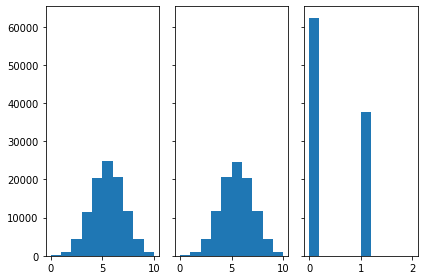

In [5]:
num_lanzamientos = 10
cant_monedas = 1000
cantidad_experimentos=100000
k=0
v1s, vmins, vrands = [],[],[]
while k < cantidad_experimentos:
  v1, vmin, vrand, freq_cg = experimento(cant_monedas, num_lanzamientos)
  frec_c_v1, frec_c_vrand, frec_c_vmin, c_v1, c_vmin, c_vrand = frecuencias_por_experimento(cant_monedas, num_lanzamientos, v1, vmin, vrand, freq_cg)
  v1s.append(c_v1)
  vmins.append(c_vmin)
  vrands.append(c_vrand)
  k +=1
fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

c. Cota de Hoeffding

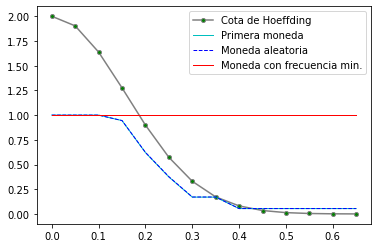

In [11]:
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1_h, vrand_h, vmin_h = np.abs(v1s-0.5), np.abs(vrands-0.5), np.abs(vmins-0.5)
epsilon = np.arange(0, 0.7, 0.05)
p_1, p_rand, p_min = np.zeros(len(epsilon)),np.zeros(len(epsilon)),np.zeros(len(epsilon))
for index in range(len(epsilon)):
    ep = epsilon[index]
    p_1[index] = np.sum(1/v1_h > ep)/cantidad_experimentos
    p_rand[index] = np.sum(1/vrand_h > ep )/cantidad_experimentos
    p_min[index] = np.sum(1/vmin_h > ep)/cantidad_experimentos
cotaHoeff = 2*np.exp(-2*num_lanzamientos*epsilon**2)
plt.plot(epsilon, cotaHoeff, marker='.', markerfacecolor='green', markersize=8, color='grey', label='Cota de Hoeffding')
plt.plot(epsilon, p_1, marker='', color='c' , linewidth=1, label='Primera moneda')
plt.plot(epsilon, p_rand, marker='', color='b', linewidth=1, linestyle='dashed', label='Moneda aleatoria')
plt.plot(epsilon, p_min, marker='', color='r', linewidth=1, label='Moneda con frecuencia min.')
plt.legend()

d. La cota de Hoeffding, que nos dice que la suma de las variables aleatorias, se desvia cierta cantidad del valor esperado, además parte del supuesto que tomamos una hipotesis antes de realizar la experimentación, lo que pasa cuando tomamos la primera moneda y la moneda aleatoria, pero en el caso de la moneda con la frecuencia minima, se realiza el experimento primero, y se toma intencionadamente una distribución, por lo cual deja de ser aleatoria, por lo cual no cumple con la cota. 

e. 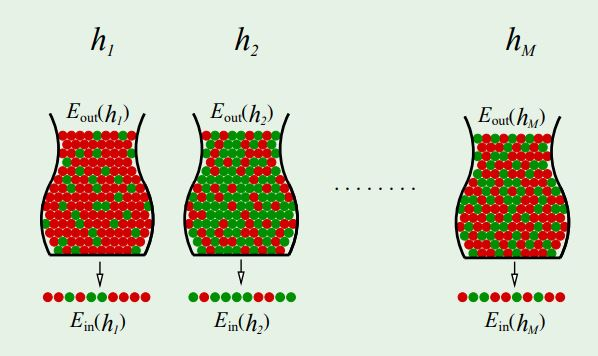

Es como en este ejemplo en particular elegimos el tarro con caracteristicas especificas y posteriormente escogemos la hipotesis que mejor corresponda con los elementos del espacio, y el problema parte en que truncamos la capacidad de aprendizaje del algoritmo, para los futuros ejemplos.